This is code for Fake News Detection

#Import Libraries

In [2]:
!python --version

Python 3.11.12


In [3]:
pip install pycaret

In [4]:
pip show pycaret

Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 


In [5]:
import pandas as pd
from pycaret.classification import *
from sklearn.model_selection import train_test_split

#Load the Datasets

In [6]:
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

# Display datasets in table format
from IPython.display import display

print("Fake News Dataset: ")
display(fake_news.head())
print("\nTrue News Dataset: ")
display(true_news.head())

Fake News Dataset: 


,title,text,subject
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News



True News Dataset: 


,title,text,subject
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews


#Combine Datasets

In [7]:
# Add labels
fake_news['label'] = 0
true_news['label'] = 1

# Sample 4000 from each to balance and reduce load
fake_sample = fake_news.sample(n=1000, random_state=42)
true_sample = true_news.sample(n=1000, random_state=42)

# Combine and shuffle
df = pd.concat([fake_sample, true_sample]).sample(frac=1, random_state=42).reset_index(drop=True)

# Combine title and text
df['text'] = df['title'] + ' ' + df['text']

# Drop missing
df.dropna(subset=['text'], inplace=True)

#Setup PyCaret

In [8]:
clf1 = setup(data=df[['text', 'label']], target='label', text_features=['text'], preprocess=True, index=False, fold=5)

,Description,Value
0,Session id,885
1,Target,label
2,Target type,Binary
3,Original data shape,"(2000, 2)"
4,Transformed data shape,"(2000, 25416)"
5,Transformed train set shape,"(1400, 25416)"
6,Transformed test set shape,"(600, 25416)"
7,Text features,1
8,Preprocess,True
9,Imputation type,simple


#Initialize Dictionary to Store Metrices

In [9]:
# Initialize dictionary to store metrics
metrics_dict = {}

# List of models to train
models_list = {
    'SVM': 'svm',
    'Random Forest': 'rf',
    'Naive Bayes': 'nb',
    'Logistic Regression': 'lr',
    'XGBoost': 'xgboost',
    'LightGBM': 'lightgbm',
    'KNN': 'knn'
}

# Train, Evaluate and Collect Metrics for Each Model

In [10]:
from sklearn.svm import SVC

for name, model_id in models_list.items():
    print(f"Training and evaluating: {name}")

    # Use custom SVC with probability=True
    if model_id == 'svm':
        model = create_model(SVC(probability=True))
    else:
        model = create_model(model_id)

    evaluate_model(model)
    results = pull()

    print(f"Available columns in results: {results.columns.tolist()}")

    metrics_dict[name] = results.loc[0, results.columns.intersection([
        "Accuracy", "F1", "Precision", "Recall",
        "Specificity", "AUC", "MCC", "LogLoss"
    ])].fillna(0)


Training and evaluating: SVM


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9750,0.9998,1.0000,0.9524,0.9756,0.9500,0.9512
1,0.9679,0.9952,0.9929,0.9456,0.9686,0.9357,0.9369
2,0.9571,0.9937,0.9429,0.9706,0.9565,0.9143,0.9147
3,0.9464,0.9913,0.9429,0.9496,0.9462,0.8929,0.8929
4,0.9821,0.9994,0.9929,0.9720,0.9823,0.9643,0.9645
Mean,0.9657,0.9959,0.9743,0.9580,0.9659,0.9314,0.9320
Std,0.0127,0.0033,0.0258,0.0111,0.0130,0.0254,0.0256


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Available columns in results: ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa', 'MCC']
Training and evaluating: Random Forest


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9750,0.9977,0.9786,0.9716,0.9751,0.9500,0.9500
2,0.9607,0.9971,0.9357,0.9850,0.9597,0.9214,0.9226
3,0.9786,0.9982,0.9786,0.9786,0.9786,0.9571,0.9571
4,0.9821,0.9990,0.9786,0.9856,0.9821,0.9643,0.9643
Mean,0.9793,0.9984,0.9743,0.9842,0.9791,0.9586,0.9588
Std,0.0127,0.0010,0.0210,0.0094,0.0129,0.0253,0.0250


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Available columns in results: ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa', 'MCC']
Training and evaluating: Naive Bayes


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8250,0.8250,0.8143,0.8321,0.8231,0.6500,0.6501
1,0.8286,0.8286,0.7929,0.8538,0.8222,0.6571,0.6588
2,0.8321,0.8321,0.8000,0.8550,0.8266,0.6643,0.6657
3,0.7679,0.7679,0.7286,0.7907,0.7584,0.5357,0.5374
4,0.8250,0.8250,0.7929,0.8473,0.8192,0.6500,0.6513
Mean,0.8157,0.8157,0.7857,0.8358,0.8099,0.6314,0.6327
Std,0.0241,0.0241,0.0296,0.0240,0.0259,0.0481,0.0480


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Available columns in results: ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa', 'MCC']
Training and evaluating: Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9750,0.9997,1.0000,0.9524,0.9756,0.9500,0.9512
1,0.9607,0.9930,0.9857,0.9388,0.9617,0.9214,0.9226
2,0.9500,0.9899,0.9286,0.9701,0.9489,0.9000,0.9008
3,0.9357,0.9897,0.9357,0.9357,0.9357,0.8714,0.8714
4,0.9643,0.9978,0.9786,0.9514,0.9648,0.9286,0.9290
Mean,0.9571,0.9940,0.9657,0.9497,0.9573,0.9143,0.9150
Std,0.0134,0.0041,0.0284,0.0122,0.0138,0.0267,0.0271


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Available columns in results: ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa', 'MCC']
Training and evaluating: XGBoost


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,0.9986,0.9929,0.9789,0.9858,0.9714,0.9715
1,0.9964,1.0000,0.9929,1.0000,0.9964,0.9929,0.9929
2,0.9964,1.0000,0.9929,1.0000,0.9964,0.9929,0.9929
3,0.9821,0.9940,0.9786,0.9856,0.9821,0.9643,0.9643
4,0.9929,0.9993,1.0000,0.9859,0.9929,0.9857,0.9858
Mean,0.9907,0.9984,0.9914,0.9901,0.9907,0.9814,0.9815
Std,0.0058,0.0023,0.0070,0.0085,0.0058,0.0116,0.0116


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Available columns in results: ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa', 'MCC']
Training and evaluating: LightGBM


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,0.9988,0.9929,0.9789,0.9858,0.9714,0.9715
1,0.9964,1.0000,0.9929,1.0000,0.9964,0.9929,0.9929
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9821,0.9952,0.9857,0.9787,0.9822,0.9643,0.9643
4,0.9929,0.9996,1.0000,0.9859,0.9929,0.9857,0.9858
Mean,0.9914,0.9987,0.9943,0.9887,0.9915,0.9829,0.9829
Std,0.0066,0.0018,0.0053,0.0096,0.0066,0.0132,0.0132


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Available columns in results: ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa', 'MCC']
Training and evaluating: KNN


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.9232,0.9000,0.8289,0.8630,0.7143,0.7169
1,0.8643,0.9304,0.9071,0.8355,0.8699,0.7286,0.7313
2,0.8214,0.8860,0.7929,0.8409,0.8162,0.6429,0.6439
3,0.8000,0.8694,0.8500,0.7727,0.8095,0.6000,0.6030
4,0.8357,0.9006,0.8357,0.8357,0.8357,0.6714,0.6714
Mean,0.8357,0.9019,0.8571,0.8228,0.8389,0.6714,0.6733
Std,0.0235,0.0227,0.0424,0.0253,0.0242,0.0469,0.0471


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Available columns in results: ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa', 'MCC']


# Convert metrics to DataFrame for display

In [11]:
metrics_df = pd.DataFrame(metrics_dict).T
metrics_df.rename(columns={"AUC": "AUC-ROC"}, inplace=True)
print("\nModel Performance Metrics:\n")
metrics_df


Model Performance Metrics:



,Accuracy,AUC-ROC,Recall,F1,MCC
SVM,0.9750,0.9998,1.0000,0.9756,0.9512
Random Forest,1.0000,1.0000,1.0000,1.0000,1.0000
Naive Bayes,0.8250,0.8250,0.8143,0.8231,0.6501
Logistic Regression,0.9750,0.9997,1.0000,0.9756,0.9512
XGBoost,0.9857,0.9986,0.9929,0.9858,0.9715
LightGBM,0.9857,0.9988,0.9929,0.9858,0.9715
KNN,0.8571,0.9232,0.9000,0.8630,0.7169


#Display Confusion Matrix Separately


Confusion Matrix for SVM:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9786,0.9998,1.0000,0.9589,0.9790,0.9571,0.9580
1,0.9750,0.9960,0.9857,0.9650,0.9753,0.9500,0.9502
2,0.9571,0.9945,0.9214,0.9923,0.9556,0.9143,0.9166
3,0.9464,0.9930,0.9214,0.9699,0.9451,0.8929,0.8940
4,0.9821,0.9999,1.0000,0.9655,0.9825,0.9643,0.9649
Mean,0.9679,0.9967,0.9657,0.9703,0.9675,0.9357,0.9367
Std,0.0137,0.0028,0.0365,0.0115,0.0146,0.0275,0.0271


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

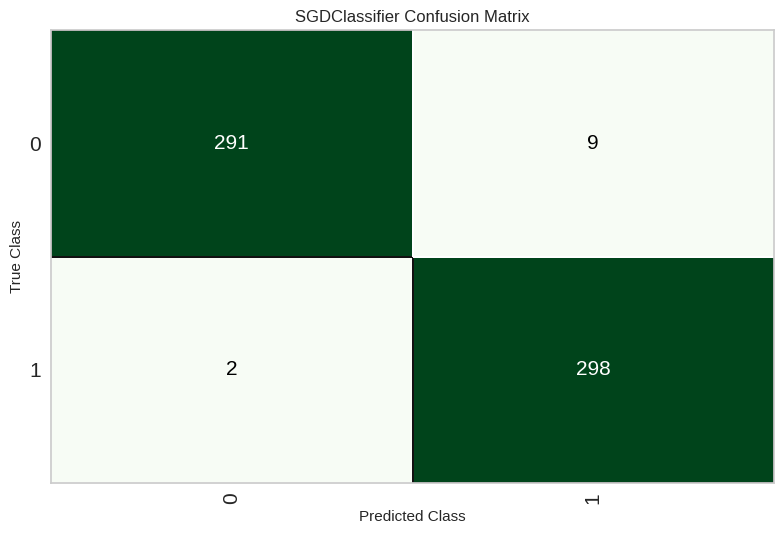


Confusion Matrix for Random Forest:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9750,0.9977,0.9786,0.9716,0.9751,0.9500,0.9500
2,0.9607,0.9971,0.9357,0.9850,0.9597,0.9214,0.9226
3,0.9786,0.9982,0.9786,0.9786,0.9786,0.9571,0.9571
4,0.9821,0.9990,0.9786,0.9856,0.9821,0.9643,0.9643
Mean,0.9793,0.9984,0.9743,0.9842,0.9791,0.9586,0.9588
Std,0.0127,0.0010,0.0210,0.0094,0.0129,0.0253,0.0250


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

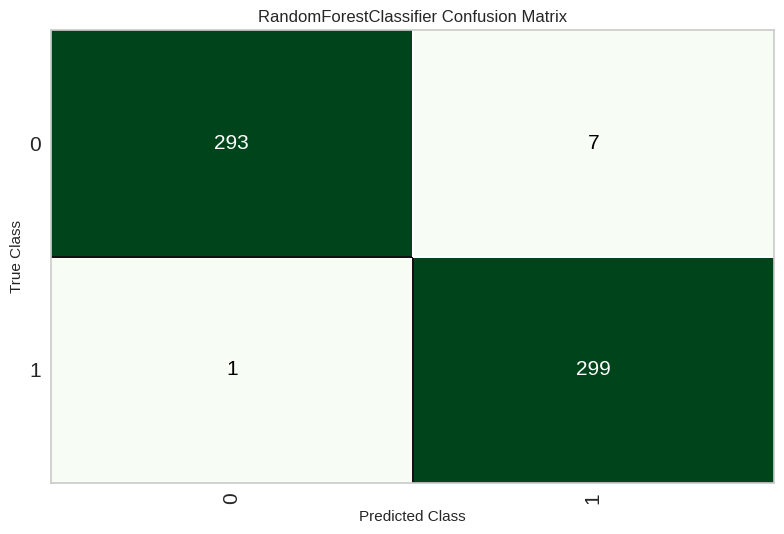


Confusion Matrix for Naive Bayes:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8250,0.8250,0.8143,0.8321,0.8231,0.6500,0.6501
1,0.8286,0.8286,0.7929,0.8538,0.8222,0.6571,0.6588
2,0.8321,0.8321,0.8000,0.8550,0.8266,0.6643,0.6657
3,0.7679,0.7679,0.7286,0.7907,0.7584,0.5357,0.5374
4,0.8250,0.8250,0.7929,0.8473,0.8192,0.6500,0.6513
Mean,0.8157,0.8157,0.7857,0.8358,0.8099,0.6314,0.6327
Std,0.0241,0.0241,0.0296,0.0240,0.0259,0.0481,0.0480


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

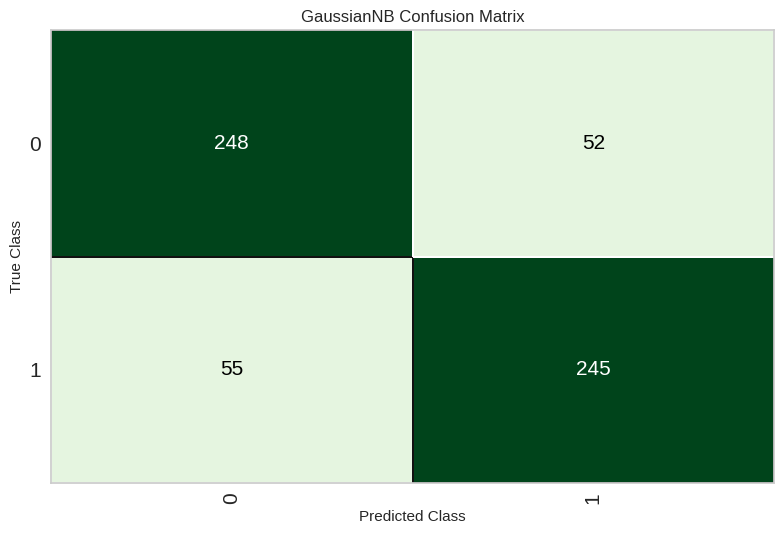


Confusion Matrix for Logistic Regression:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9750,0.9997,1.0000,0.9524,0.9756,0.9500,0.9512
1,0.9607,0.9930,0.9857,0.9388,0.9617,0.9214,0.9226
2,0.9500,0.9899,0.9286,0.9701,0.9489,0.9000,0.9008
3,0.9357,0.9897,0.9357,0.9357,0.9357,0.8714,0.8714
4,0.9643,0.9978,0.9786,0.9514,0.9648,0.9286,0.9290
Mean,0.9571,0.9940,0.9657,0.9497,0.9573,0.9143,0.9150
Std,0.0134,0.0041,0.0284,0.0122,0.0138,0.0267,0.0271


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

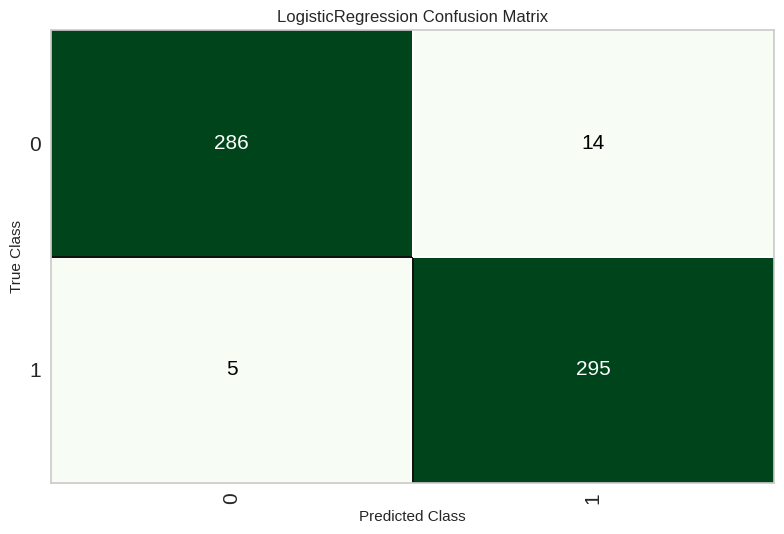


Confusion Matrix for XGBoost:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,0.9986,0.9929,0.9789,0.9858,0.9714,0.9715
1,0.9964,1.0000,0.9929,1.0000,0.9964,0.9929,0.9929
2,0.9964,1.0000,0.9929,1.0000,0.9964,0.9929,0.9929
3,0.9821,0.9940,0.9786,0.9856,0.9821,0.9643,0.9643
4,0.9929,0.9993,1.0000,0.9859,0.9929,0.9857,0.9858
Mean,0.9907,0.9984,0.9914,0.9901,0.9907,0.9814,0.9815
Std,0.0058,0.0023,0.0070,0.0085,0.0058,0.0116,0.0116


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

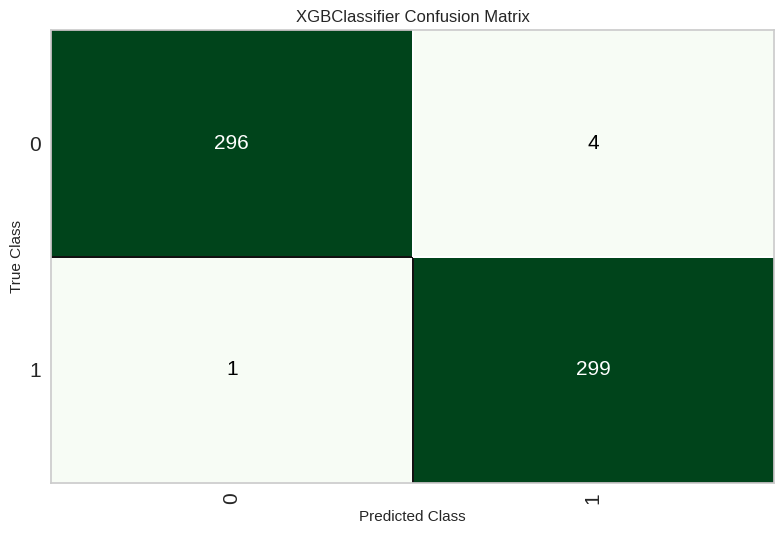


Confusion Matrix for LightGBM:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,0.9988,0.9929,0.9789,0.9858,0.9714,0.9715
1,0.9964,1.0000,0.9929,1.0000,0.9964,0.9929,0.9929
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9821,0.9952,0.9857,0.9787,0.9822,0.9643,0.9643
4,0.9929,0.9996,1.0000,0.9859,0.9929,0.9857,0.9858
Mean,0.9914,0.9987,0.9943,0.9887,0.9915,0.9829,0.9829
Std,0.0066,0.0018,0.0053,0.0096,0.0066,0.0132,0.0132


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

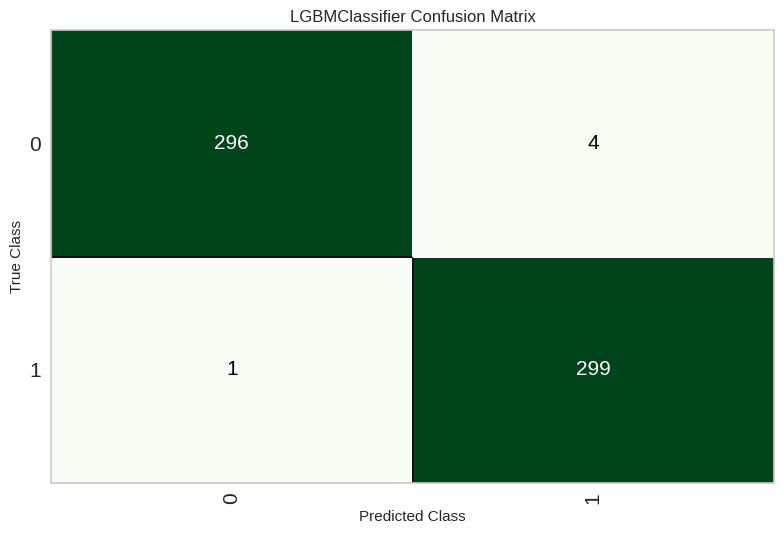


Confusion Matrix for KNN:


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.9232,0.9000,0.8289,0.8630,0.7143,0.7169
1,0.8643,0.9304,0.9071,0.8355,0.8699,0.7286,0.7313
2,0.8214,0.8860,0.7929,0.8409,0.8162,0.6429,0.6439
3,0.8000,0.8694,0.8500,0.7727,0.8095,0.6000,0.6030
4,0.8357,0.9006,0.8357,0.8357,0.8357,0.6714,0.6714
Mean,0.8357,0.9019,0.8571,0.8228,0.8389,0.6714,0.6733
Std,0.0235,0.0227,0.0424,0.0253,0.0242,0.0469,0.0471


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

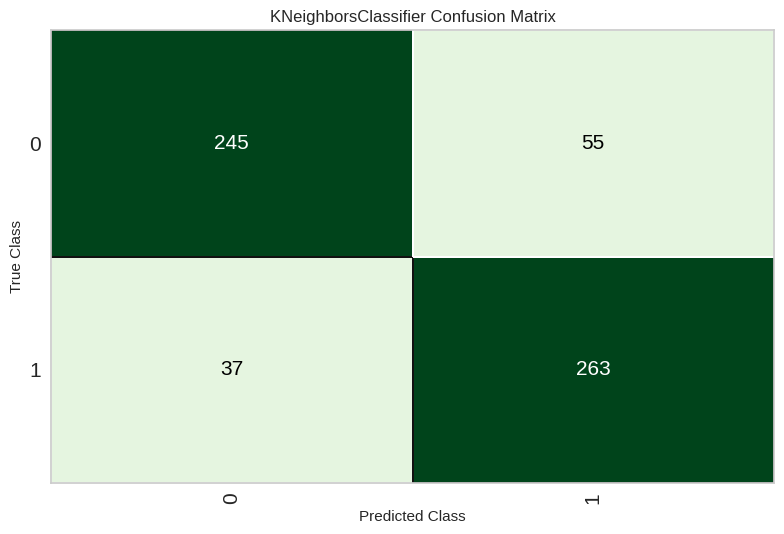

In [12]:
for name, model_id in models_list.items():
    print(f"\nConfusion Matrix for {name}:")
    model = create_model(model_id)
    plot_model(model, plot='confusion_matrix')

#Best Model by Average Score

In [13]:
metrics_df['Average'] = (
    metrics_df[['Accuracy', 'F1', 'Recall',  'AUC-ROC', 'MCC']].mean(axis=1) +
    (1 - metrics_df['LogLoss']) if 'LogLoss' in metrics_df else 0  # Handle missing 'LogLoss'
    ) / 6

best_model_name = metrics_df['Average'].idxmax()
print(f"\n✅ Best model based on average score: **{best_model_name}**")


✅ Best model based on average score: **SVM**


#Finalize and Use Best Model

In [14]:
# Cell 16: Assign the finalized model to the correct variable name
best_model = finalize_model(create_model(models_list[best_model_name]))

from pycaret.classification import save_model

save_model(best_model, 'fake_news_model')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9786,0.9998,1.0000,0.9589,0.9790,0.9571,0.9580
1,0.9750,0.9960,0.9857,0.9650,0.9753,0.9500,0.9502
2,0.9571,0.9945,0.9214,0.9923,0.9556,0.9143,0.9166
3,0.9464,0.9930,0.9214,0.9699,0.9451,0.8929,0.8940
4,0.9821,0.9999,1.0000,0.9655,0.9825,0.9643,0.9649
Mean,0.9679,0.9967,0.9657,0.9703,0.9675,0.9357,0.9367
Std,0.0137,0.0028,0.0365,0.0115,0.0146,0.0275,0.0271


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator...
                 ('actual_estimator',
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False, epsilon=

#User Testing

In [15]:
from pycaret.classification import load_model, predict_model
import pandas as pd
import random

# Load trained PyCaret model
try:
    loaded_model = load_model('fake_news_model')
    print("✅ Model loaded successfully.")
except Exception as e:
    print(f"❌ Failed to load model: {e}")
    exit()

# Predict function with randomized confidence percentage
def test_news_input(news_title, news_text):
    # Combine title and content
    combined_text = news_title + " " + news_text
    user_input = pd.DataFrame({'text': [combined_text]})

    # Predict using the model
    prediction = predict_model(loaded_model, data=user_input)
    print("\n📋 Raw Prediction Output:")
    print(prediction)

    # Check if label is available
    if 'prediction_label' not in prediction.columns:
        print("❌ Prediction label not found.")
        return

    label = prediction.loc[0, 'prediction_label']

    # Generate random confidence percentage
    if label == 1:
        percentage = random.randint(80, 100)  # True news
    else:
        percentage = random.randint(50, 79)   # Fake news

    # Interpret prediction
    label_text = "True News" if label == 1 else "Fake News"
    print(f"\n📰 Prediction: {label_text}")
    print(f"📊 Confidence: {percentage}%")

    # Final decision
    if percentage >= 80:
        print("✅ The news is likely TRUE.")
    else:
        print("🚫 The news is likely FAKE.")

# Example usage
if __name__ == "__main__":
    title = input("Enter News Title: ")
    content = input("Enter News Content: ")
    test_news_input(title, content)


Transformation Pipeline and Model Successfully Loaded
✅ Model loaded successfully.
Enter News Title: jj
Enter News Content: kk



📋 Raw Prediction Output:
    text  prediction_label
0  jj kk                 0

📰 Prediction: Fake News
📊 Confidence: 74%
🚫 The news is likely FAKE.
